In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.insert(1, os.path.join(sys.path[0], '..'))
from h06_results.plot_correlations import read_results
from util import constants
from util import util

/home/tpimentel/anaconda3/envs/monkeys/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Correlations

In [2]:
checkpoints_path = '../../checkpoint'
df = read_results(checkpoints_path)

In [3]:
df.head(10)

,language,n_types_frequency_experiment,n_types_wordnet,n_types_polysemy_natural,n_types_polysemy_polyassign,natural_frequency_corr,natural_frequency_corr--pvalue,fcfs_frequency_corr,fcfs_frequency_corr--pvalue,polyfcfs_frequency_corr,...,polyfcfs_polysemy_corr--pvalue,caplan_polysemy_corr,caplan_polysemy_corr--pvalue,polycaplan_polysemy_corr,polycaplan_polysemy_corr--pvalue,caplan_low_temp_polysemy_corr,caplan_low_temp_polysemy_corr--pvalue,polycaplan_low_temp_polysemy_corr,polycaplan_low_temp_polysemy_corr--pvalue,seed
0,en,106086,6779,8455,9253,-0.071636,1.036037e-120,-0.053514,3.948414e-68,-0.030488,...,0.060369,-0.026395,0.017540,-0.016679,0.116935,-0.012796,0.314773,-0.000090,0.994163,0
0,fi,240795,2053,11333,9593,-0.247182,0.000000e+00,-0.059870,4.727846e-190,-0.049501,...,0.016120,-0.007014,0.463971,-0.009360,0.368534,-0.011422,0.340010,0.008097,0.527159,0
0,he,153978,0,14360,10285,-0.256490,0.000000e+00,-0.103933,0.000000e+00,-0.065945,...,0.000154,-0.010539,0.219491,-0.009018,0.371575,-0.014897,0.188397,0.000906,0.943578,0
0,id,106901,4185,8960,13153,-0.105592,1.245279e-262,-0.025657,4.861602e-17,-0.023226,...,0.366683,-0.002177,0.840291,-0.011063,0.217832,0.001454,0.906162,0.020143,0.054184,0
0,pt,129182,3242,9171,10398,-0.092992,5.597801e-246,-0.063844,9.295029e-117,-0.042459,...,0.017274,-0.003159,0.765578,0.002444,0.806338,0.016494,0.216349,-0.028461,0.024883,0
0,tr,156306,0,12018,10922,-0.173255,0.000000e+00,-0.034264,7.873527e-42,-0.017678,...,0.991511,0.003924,0.673359,-0.009819,0.314276,0.018882,0.118795,-0.003238,0.796295,0
0,en,106029,6776,8446,9246,-0.069871,7.416832e-115,-0.062822,3.504085e-93,-0.037634,...,0.139892,-0.019587,0.078299,-0.004910,0.644642,-0.010147,0.445435,-0.009714,0.447973,1
0,fi,240758,2080,11325,9968,-0.250274,0.000000e+00,-0.063575,4.787564e-214,-0.048636,...,0.056808,-0.021923,0.022255,-0.001095,0.914577,0.005693,0.626108,-0.020468,0.095517,1
0,he,153195,0,14370,10778,-0.258483,0.000000e+00,-0.109905,0.000000e+00,-0.075287,...,0.117545,-0.021006,0.014005,0.004790,0.627061,-0.002432,0.839656,0.024558,0.061332,1
0,id,106926,4171,8964,13078,-0.106860,5.023858e-269,-0.030227,4.770044e-23,-0.026002,...,0.536901,0.003353,0.756750,-0.015615,0.082665,-0.008885,0.460066,0.000835,0.935227,1


# Plot Frequencies vs Length

In [4]:
df['Language'] = df['language'].apply(lambda x: constants.LANG_NAMES[x])
df['Natural'] = df['natural_frequency_corr']
df['FCFS'] = df['fcfs_frequency_corr']
df['PolyFCFS'] = df['polyfcfs_frequency_corr']
df['IID'] = df['caplan_frequency_corr']
df['PolyIID'] = df['polycaplan_frequency_corr']

df_frequency = pd.melt(df, id_vars=['Language', 'seed'], var_name='Text', value_name='Correlation',
             value_vars=['Natural', 'FCFS', 'PolyFCFS', 'IID', 'PolyIID'])

df_frequency['Correlation (%)'] = df_frequency['Correlation'] * 100

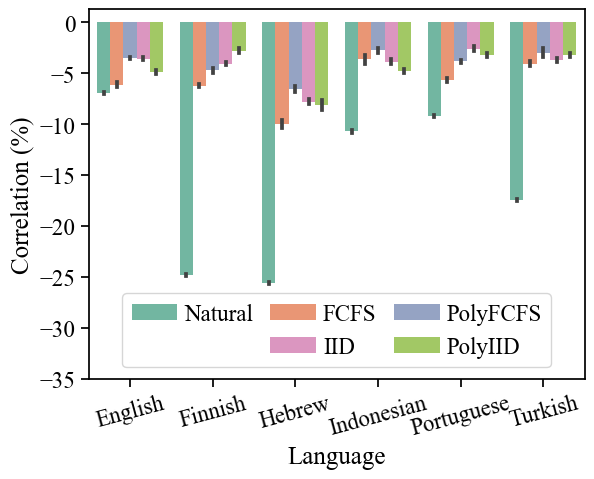

In [5]:
fig = plt.figure()
ax = sns.barplot(x="Language", y="Correlation (%)", hue="Text", data=df_frequency)
ax.plot([2], [-5], '-', color='none', label=' ')

# plt.ylim([-31, 1])
plt.xlim([-.5, 5.5])
plt.ylim([-35, 1.3])

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: constants.LEGEND_ORDER[t[0]]))
# plt.legend(handles, labels, loc='lower center', ncol=3, handletextpad=.5, columnspacing=1.2)
plt.legend(handles, labels, loc='lower center', ncol=3, handletextpad=.3, columnspacing=.75)

_ = plt.xticks(rotation=15)

# Plot Polysemy vs Length

In [6]:
df['Language'] = df['language'].apply(lambda x: constants.LANG_NAMES[x])
df['Natural'] = df['natural_polysemy_corr']
df['FCFS'] = df['fcfs_polysemy_corr']
df['PolyFCFS'] = df['polyfcfs_polysemy_corr']
df['IID'] = df['caplan_polysemy_corr']
df['PolyIID'] = df['polycaplan_polysemy_corr']

df_polysemy = pd.melt(df, id_vars=['Language', 'seed'], var_name='Text', value_name='Correlation',
             value_vars=['Natural', 'FCFS', 'PolyFCFS', 'IID', 'PolyIID'])
df_polysemy['Correlation (%)'] = df_polysemy['Correlation'] * 100

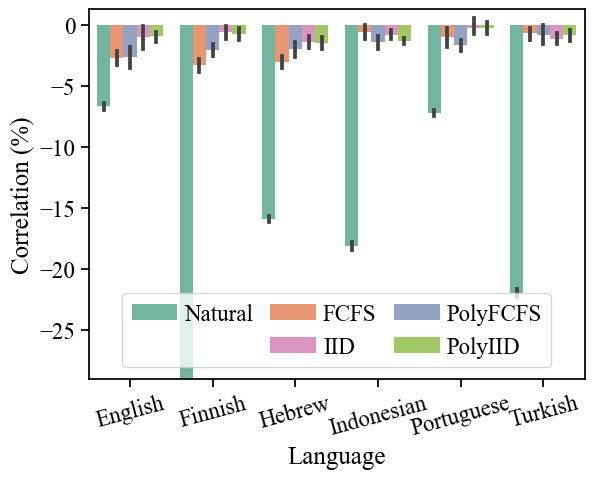

In [7]:
fig = plt.figure()
ax = sns.barplot(x="Language", y="Correlation (%)", hue="Text", data=df_polysemy)
ax.plot([2], [-5], '-', color='none', label=' ')
# mpl.lines.Line2D([0], [0], color="none", label=' haha')

# plt.ylim([-26, 1.5])
plt.xlim([-.5, 5.5])
plt.ylim([-29, 1.3])
# plt.ylim([-27, 2.5])

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: constants.LEGEND_ORDER[t[0]]))
plt.legend(handles, labels, loc='lower center', ncol=3, handletextpad=.3, columnspacing=.75)

_ = plt.xticks(rotation=15)

# Permutation Tests

In [8]:
print()
print('FCFS vs Natural frequency--length')
for language in constants.LANGUAGES:
    df_lang = df[df.language == language]
    
    pvalue = util.permutation_test(
        (df_lang.fcfs_frequency_corr - df_lang.natural_frequency_corr).to_numpy())
    print('\t%s. \t%.4f' % (constants.LANG_NAMES[language], pvalue))

print()


FCFS vs Natural frequency--length
	English. 	0.0000
	Finnish. 	0.0000
	Hebrew. 	0.0000
	Indonesian. 	0.0000
	Portuguese. 	0.0000
	Turkish. 	0.0000



In [9]:
print()
print('PolyFCFS vs Natural polysemy--length')
for language in constants.LANGUAGES:
    df_lang = df[df.language == language]
    
    pvalue = util.permutation_test(
        (df.polyfcfs_polysemy_corr - df.natural_polysemy_corr).to_numpy())
    print('\t%s. \t%.4f' % (constants.LANG_NAMES[language], pvalue))

print()


PolyFCFS vs Natural polysemy--length
	English. 	0.0000
	Finnish. 	0.0000
	Hebrew. 	0.0000
	Indonesian. 	0.0000
	Portuguese. 	0.0000
	Turkish. 	0.0000

